In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

In [3]:
data = pd.read_csv('./data-in/housing.csv')

In [8]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
prices = data['MEDV']
features = data.drop('MEDV', axis=1)

In [12]:
from sklearn.metrics import r2_score

In [13]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    
    return score

In [15]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print(score)

0.922855648536


In [16]:
from sklearn.cross_validation import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1)

In [18]:
import matplotlib.pyplot as plt
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split

D:\dev_tools\anaconda\envs\py36\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [21]:
def modelLearning(X, y):
#     创建10 组交叉验证集合
    cv = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)
    fig = plt.figure(figsize=(10, 7))
    
    for k, depth in enumerate([1, 3, 6, 10]):
        regressor = DecisionTreeRegressor(max_depth= depth)
        
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
                                                                cv = cv, train_sizes=train_sizes,scoring='r2')
        train_std = np.std(train_scores, axis=1)
        train_mean = np.mean(train_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color='r', label='training score')
        ax.plot(sizes, test_mean, 'o-', color='g', label='testing score')
        ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
        ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
        
        ax.set_title('max_depth = %s' % depth)
        ax.set_xlabel('number of training points')
        ax.set_ylabel('score')
        ax.set_xlim([0, X.shape[0] * 0.8])
        ax.set_ylim([-0.05, 1.05])
        
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad= 0.)
    fig.tight_layout()
    fig.show()

D:\dev_tools\anaconda\envs\py36\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


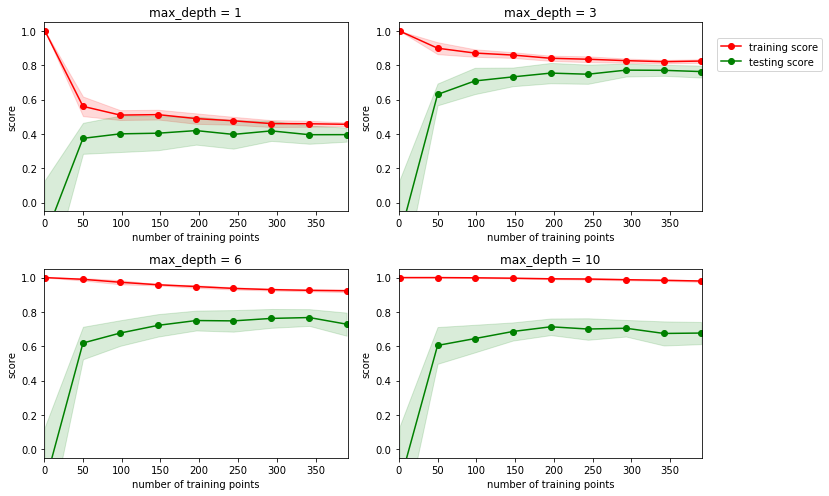

In [24]:
%matplotlib inline
modelLearning(features, prices)